In [17]:
import pandas as pd
import random


num_students = 50
registration_numbers = [f"REG{1000+i}" for i in range(num_students)]
names = [f"Student_{i}" for i in range(1, num_students+1)]
tt1_marks = [random.randint(5, 20) for _ in range(num_students)]
tt2_marks = [random.randint(5, 20) for _ in range(num_students)]


df_tt1 = pd.DataFrame({"Registration Number": registration_numbers, "Name": names, "TT-1 Marks": tt1_marks})
df_tt2 = pd.DataFrame({"Registration Number": registration_numbers, "Name": names, "TT-2 Marks": tt2_marks})


df_tt1.to_csv("term-test-1-result.csv", index=False)
df_tt2.to_csv("term-test-2-result.csv", index=False)

print("CSV files for term tests created successfully!")


CSV files for term tests created successfully!


In [19]:

df_tt1 = pd.read_csv("term-test-1-result.csv")
df_tt2 = pd.read_csv("term-test-2-result.csv")


df_merged = pd.merge(df_tt1, df_tt2, on=["Registration Number", "Name"])
print(df_merged.head())  


  Registration Number       Name  TT-1 Marks  TT-2 Marks
0             REG1000  Student_1           9          20
1             REG1001  Student_2           9           8
2             REG1002  Student_3          10          12
3             REG1003  Student_4           9          20
4             REG1004  Student_5          11           9


In [21]:
df_merged["Best TT Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].max(axis=1)
df_merged["Average TT Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].mean(axis=1)


df_merged = df_merged.drop(columns=["TT-1 Marks", "TT-2 Marks"])
print(df_merged.head())


  Registration Number       Name  Best TT Marks  Average TT Marks
0             REG1000  Student_1             20              14.5
1             REG1001  Student_2              9               8.5
2             REG1002  Student_3             12              11.0
3             REG1003  Student_4             20              14.5
4             REG1004  Student_5             11              10.0


In [23]:

attendance_marks = [random.randint(5, 10) for _ in range(num_students)]
term_final_marks = [random.randint(40, 100) for _ in range(num_students)]


df_attendance = pd.DataFrame({"Registration Number": registration_numbers, "Attendance Marks": attendance_marks, "Term Final Marks": term_final_marks})

df_attendance.to_csv("attendance.csv", index=False)


df_attendance = pd.read_csv("attendance.csv")


df_final = pd.merge(df_merged, df_attendance, on="Registration Number")


df_final["Final Marks"] = df_final["Term Final Marks"] * 0.7 + df_final["Average TT Marks"] + df_final["Attendance Marks"]
print(df_final.head())


df_final.to_csv("final-result.csv", index=False)


  Registration Number       Name  Best TT Marks  Average TT Marks  \
0             REG1000  Student_1             20              14.5   
1             REG1001  Student_2              9               8.5   
2             REG1002  Student_3             12              11.0   
3             REG1003  Student_4             20              14.5   
4             REG1004  Student_5             11              10.0   

   Attendance Marks  Term Final Marks  Final Marks  
0                 8                71         72.2  
1                10                89         80.8  
2                 5                96         83.2  
3                 6                59         61.8  
4                 7                91         80.7  


C:\Users\WALTON\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


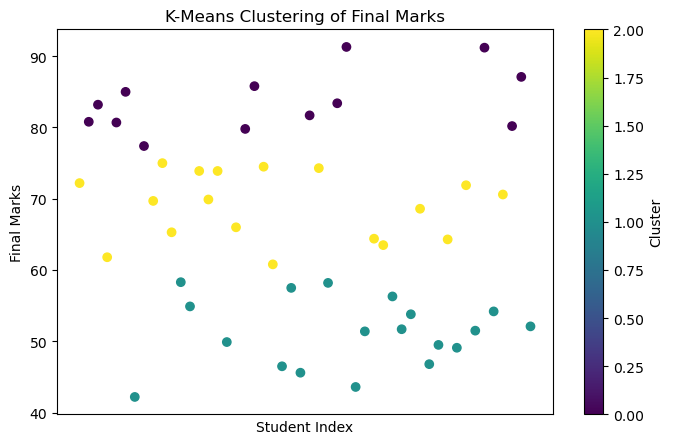

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = df_final[["Final Marks"]]


k = 3  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_final["Cluster"] = kmeans.fit_predict(X)


plt.figure(figsize=(8, 5))
plt.scatter(df_final["Registration Number"], df_final["Final Marks"], c=df_final["Cluster"], cmap="viridis", marker="o")
plt.xlabel("Student Index")
plt.ylabel("Final Marks")
plt.title("K-Means Clustering of Final Marks")
plt.colorbar(label="Cluster")
plt.xticks([]) 
plt.show()
